In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import time
sys.path.append('/'.join(sys.path[0].split('/')[:-1]))

from modules.full_pipeline_multiple_steps import main

Loading data to RAM...
Time: 35.59s
Loading data to RAM...
Time: 6.14s
Define model...
Model name:  all_const_len2_delta_6_architecture_loss_v0_8steps_increas_reinitialize_residual_l3_per_epoch


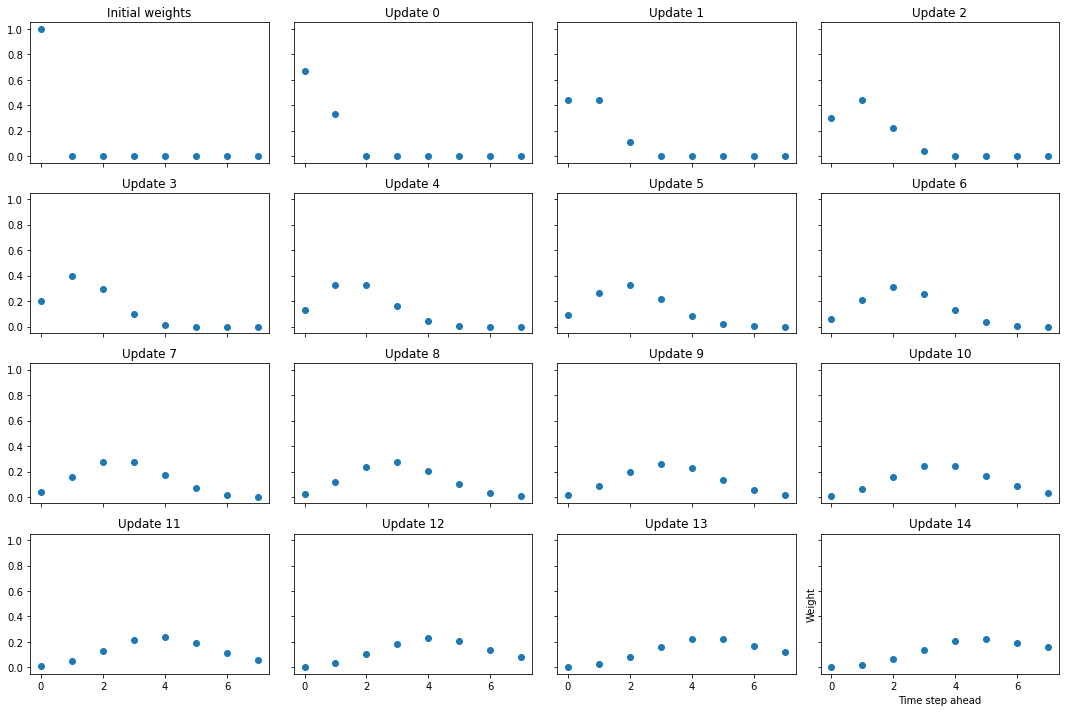

Starting epoch 1
Time initial steps: 0.001s
Batch idx: 20100; Loss: 0.038 - Other 0.00000 - 8966Epoch:   1/  1  - loss: 0.038  - val_loss: 0.02979  - time: 6938.212208
Starting epoch 2
Time initial steps: 0.001s
Batch idx: 20100; Loss: 0.031 - Other 0.00000 - 15364Epoch:   1/  1  - loss: 0.031  - val_loss: 0.03412  - time: 9187.477361
Starting epoch 3
Time initial steps: 0.005s
Batch idx: 20100; Loss: 0.028 - Other 0.00000 - 15204Epoch:   1/  1  - loss: 0.028  - val_loss: 0.02955  - time: 9248.430166
Starting epoch 4
Time initial steps: 0.001s
Batch idx: 20100; Loss: 0.027 - Other 0.00000 - 14568Epoch:   1/  1  - loss: 0.027  - val_loss: 0.02968  - time: 9180.252326
Starting epoch 5
Time initial steps: 0.003s
Batch idx: 20100; Loss: 0.027 - Other 0.00000 - 16115Epoch:   1/  1  - loss: 0.027  - val_loss: 0.03067  - time: 9309.959171
Starting epoch 6
Time initial steps: 0.001s
Batch idx: 20100; Loss: 0.026 - Other 0.00000 - 16502Epoch:   1/  1  - loss: 0.026  - val_loss: 0.02913  - time:

In [3]:
train_loss_ev, val_loss_ev, train_loss_steps_ev, test_loss_steps_ev, weight_variations_ev = \
main('config_residual_multiple_steps.json', load_model=False)

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

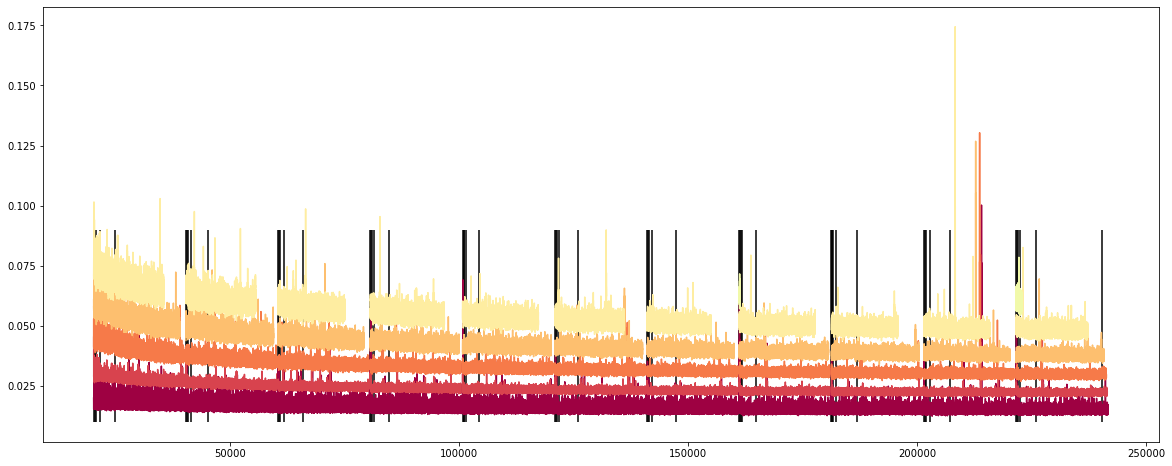

In [11]:
len_epoch = len(train_loss_steps_ev[0]['t0'])
x_iter = np.arange(len_epoch)

plt.figure(figsize=(20,8))
colors = cm.Spectral(np.linspace(0,1,10))

for ep in range(1,len(train_loss_steps_ev)):
    
    for i in range(8):
        x_iter = np.arange(len(train_loss_steps_ev[ep]['t{}'.format(i)]))
        x_iter_ep = x_iter + ep*len_epoch
        plt.plot(x_iter_ep, train_loss_steps_ev[ep]['t{}'.format(i)], c=colors[i])
    
    for (w, _, it) in weight_variations_ev[ep]:
        plt.vlines(it + ep*len_epoch, 0.01, 0.09)

In [17]:
for w in weight_variations_ev:
    for new_w in w:
        print('Epoch {} - Iteration {}'.format(new_w[1], new_w[2]))
        print('WEIGHT VECTOR: ', new_w[0])
        

Epoch 0 - Iteration 0
WEIGHT VECTOR:  [0.8 0.4 0.  0.  0.  0.  0.  0. ]
Epoch 0 - Iteration 551
WEIGHT VECTOR:  [0.53333333 0.53333333 0.13333333 0.         0.         0.
 0.         0.        ]
Epoch 0 - Iteration 1983
WEIGHT VECTOR:  [0.35555556 0.53333333 0.26666667 0.04444444 0.         0.
 0.         0.        ]
Epoch 0 - Iteration 11135
WEIGHT VECTOR:  [0.2962963  0.44444444 0.22222222 0.03703704 0.         0.
 0.         0.        ]
Epoch 0 - Iteration 0
WEIGHT VECTOR:  [0.8 0.4 0.  0.  0.  0.  0.  0. ]
Epoch 0 - Iteration 207
WEIGHT VECTOR:  [0.53333333 0.53333333 0.13333333 0.         0.         0.
 0.         0.        ]
Epoch 0 - Iteration 409
WEIGHT VECTOR:  [0.35555556 0.53333333 0.26666667 0.04444444 0.         0.
 0.         0.        ]
Epoch 0 - Iteration 1324
WEIGHT VECTOR:  [0.23703704 0.47407407 0.35555556 0.11851852 0.01481481 0.
 0.         0.        ]
Epoch 0 - Iteration 4737
WEIGHT VECTOR:  [0.19753086 0.39506173 0.2962963  0.09876543 0.01234568 0.
 0.         0.

## Idem but with long connections architecture

In [1]:
import sys
import time
sys.path.append('/'.join(sys.path[0].split('/')[:-1]))

from modules.full_pipeline_multiple_steps import main

In [2]:
{
    "directories":
            {
            "datadir": "../data/healpix/",
            "input_dir": "5.625deg_nearest/",
            "model_save_path": "models/",
            "pred_save_path": "predictions/",
            "obs_file_name": "observations_nearest.nc",
            "rmse_weyn_name": "metrics/rmses_weyn.nc",
            "constants": "constants/constants_5.625deg_standardized.nc",
            "train_mean_file": "mean_train_features_dynamic.nc",
            "train_std_file": "std_train_features_dynamic.nc",
            "metrics_path": "metrics/",
            "standardized_data": "None"
            },
    "training_constants":
    {
            "chunk_size": 521,
            "train_years": ["1990","2012"],
            "val_years": ["2013", "2016"],
            "test_years": ["2017", "2018"],
            "nodes":3072,
            "max_lead_time": 120,
            "nb_timesteps": 2,
            "nb_epochs": 14,
            "learning_rate": 0.008,
            "batch_size": 10
    },
    "model_parameters":
    {
            "len_sqce": 2,
            "delta_t": 6,
            "in_features": 7,
            "out_features":2,
            "num_steps_ahead": 8,
            "architecture_name": "loss_v0_8steps_increas_reinitialize_residual_l3_long_connections_per_epoch",
            "resolution": 5.625,
            "kernel_size_pooling": 4,
            "initial_weights": [1, 0, 0, 0, 0, 0, 0, 0],
            "model": "UNetSphericalHealpixResidualLongConnections"
    }
}

{'directories': {'datadir': '../data/healpix/',
  'input_dir': '5.625deg_nearest/',
  'model_save_path': 'models/',
  'pred_save_path': 'predictions/',
  'obs_file_name': 'observations_nearest.nc',
  'rmse_weyn_name': 'metrics/rmses_weyn.nc',
  'constants': 'constants/constants_5.625deg_standardized.nc',
  'train_mean_file': 'mean_train_features_dynamic.nc',
  'train_std_file': 'std_train_features_dynamic.nc',
  'metrics_path': 'metrics/',
  'standardized_data': 'None'},
 'training_constants': {'chunk_size': 521,
  'train_years': ['1990', '2012'],
  'val_years': ['2013', '2016'],
  'test_years': ['2017', '2018'],
  'nodes': 3072,
  'max_lead_time': 120,
  'nb_timesteps': 2,
  'nb_epochs': 14,
  'learning_rate': 0.008,
  'batch_size': 10},
 'model_parameters': {'len_sqce': 2,
  'delta_t': 6,
  'in_features': 7,
  'out_features': 2,
  'num_steps_ahead': 8,
  'architecture_name': 'loss_v0_8steps_increas_reinitialize_residual_l3_long_connections_per_epoch',
  'resolution': 5.625,
  'kernel

Loading data to RAM...
Time: 36.86s
Loading data to RAM...
Time: 5.99s
Define model...
Model name:  all_const_len2_delta_6_architecture_loss_v0_8steps_increas_reinitialize_residual_l3_long_connections_per_epoch


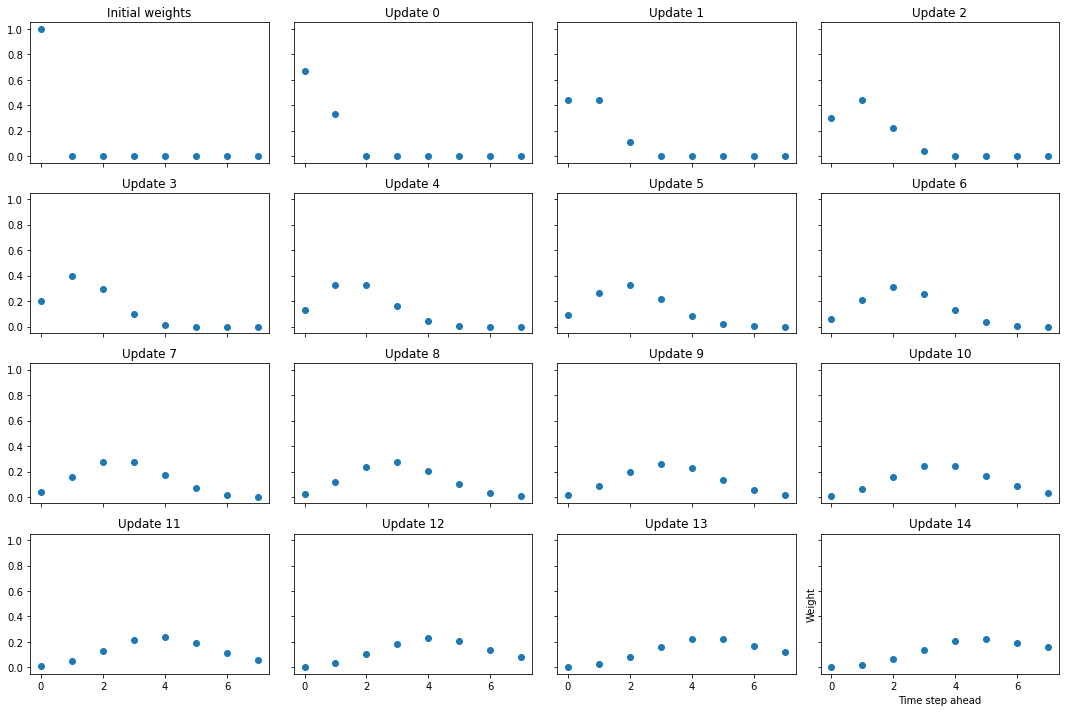

Starting epoch 1
Time initial steps: 0.006s
Batch idx: 20100; Loss: 0.037 - Other 0.00000 - 13047Epoch:   1/  1  - loss: 0.037  - val_loss: 0.03479  - time: 7830.802808
Starting epoch 2
Time initial steps: 0.001s
Batch idx: 20100; Loss: 0.031 - Other 0.00000 - 15252Epoch:   1/  1  - loss: 0.031  - val_loss: 0.03637  - time: 9867.329952
Starting epoch 3
Time initial steps: 0.004s
Batch idx: 20100; Loss: 0.029 - Other 0.00000 - 16815Epoch:   1/  1  - loss: 0.029  - val_loss: 0.03240  - time: 9983.342823
Starting epoch 4
Time initial steps: 0.007s
Batch idx: 20100; Loss: 0.028 - Other 0.00000 - 15798Epoch:   1/  1  - loss: 0.028  - val_loss: 0.02799  - time: 10076.020363
Starting epoch 5
Time initial steps: 0.006s
Batch idx: 12600; Loss: 0.026 - Other 0.00000 - 7877

In [ ]:
train_loss_ev, val_loss_ev, train_loss_steps_ev, test_loss_steps_ev, weight_variations_ev = \
main('config_residual_multiple_steps.json', load_model=False)

In [ ]:
for w in weight_variations_ev:
    for new_w in w:
        print('Epoch {} - Iteration {}'.format(new_w[1], new_w[2]))
        print('WEIGHT VECTOR: ', new_w[0])

In [ ]:
import json
import numpy as np

In [ ]:
best_epoch = np.argmin(val_loss_ev)
min_error = val_loss_ev[best_epoch]

from modules.mail import send_info_mail

In [ ]:
train_loss_json = '../data/healpix/models/train_loss_'  + '8steps_increas_reinitialize_residual_l3_long_connections_per_epoch' + '.json'
with open(train_loss_json, "w") as outfile:  
    json.dump(train_loss_steps_ev, outfile)
    
test_loss_json = '../data/healpix/models/test_loss_'  + '8steps_increas_reinitialize_residual_l3_long_connections_per_epoch' + '.json'
with open(test_loss_json, "w") as outfile:  
    json.dump(test_loss_steps_ev, outfile)

with open("../modules/confMail.json") as json_data_file:
    mailConf = json.load(json_data_file)

mail = {
    "sender": mailConf["sender"],
    "receiver": mailConf["sender"],
    "subject": "Finished training!",
    "body": "Finished training model {}.\n Min loss {} at epoch {} " \
        .format(description, min_error, best_epoch),
    "fileAttaching": "Yes",
    "file": ["../configs/" + 'config_residual_multiple_steps.json', train_loss_json, test_loss_json]

}
send_info_mail(mailInfo=mail, configFile=mailConf)

In [13]:
train_loss_json = '../data/healpix/models/train_loss_'  + '8steps_increas_reinitialize_residual_l3_long_connections_per_epoch' + '.json'
with open(train_loss_json, "w") as outfile:  
    json.dump(train_loss_steps_ev, outfile)
    
test_loss_json = '../data/healpix/models/test_loss_'  + '8steps_increas_reinitialize_residual_l3_long_connections_per_epoch' + '.json'
with open(test_loss_json, "w") as outfile:  
    json.dump(test_loss_steps_ev, outfile)

In [16]:
description = 'all_const_len2_delta_6_architecture_loss_v0_8steps_increas_reinitialize_residual_l3_long_connections_per_epoch'

In [21]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

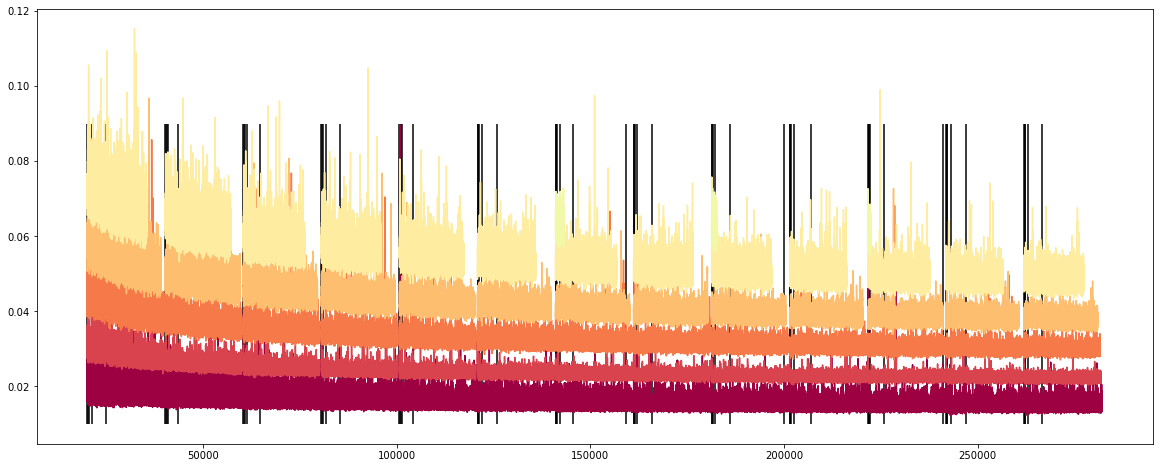

In [22]:
len_epoch = len(train_loss_steps_ev[0]['t0'])
x_iter = np.arange(len_epoch)

plt.figure(figsize=(20,8))
colors = cm.Spectral(np.linspace(0,1,10))

for ep in range(1,len(train_loss_steps_ev)):
    
    for i in range(8):
        x_iter = np.arange(len(train_loss_steps_ev[ep]['t{}'.format(i)]))
        x_iter_ep = x_iter + ep*len_epoch
        plt.plot(x_iter_ep, train_loss_steps_ev[ep]['t{}'.format(i)], c=colors[i])
    
    for (w, _, it) in weight_variations_ev[ep]:
        plt.vlines(it + ep*len_epoch, 0.01, 0.09)